Techniques
---
- PCA (Principal Component Analysis) (Found the code)
    - Calculates the amount of variances that each feature within the data set contributes to the target variable
    - Multiple PCAs can be used but it would be depending on either an elbow method or what not
    (https://etav.github.io/python/scikit_pca.html#:~:text=%20%EE%80%80Principal%20Component%20Analysis%EE%80%81%20%28%EE%80%80PCA%EE%80%81%29%20in%20%EE%80%80Python%EE%80%81%20using,amount%20of%20variance%20for%20a%20given%20data%20set.)
- Boxplot: 
    - Conducting an outlier check to see within the standard ranges of the data sets
    - May need to confirm if outliers actually influence the data sets to any significant value
- Linear Regression:
    - Calculating the influences assuming a linear scale of two factors (maybe shown in a multiple plot)
- Clustering:
    - Add on to PC components to see the influences and changes of the PC1 and PC2 based on the overall data points
- Multicollinearity Findings(Found the code)
    - Find each correlation between each features to itself and other features to demonstrate the relationships between them to reduce the amount. It finds features that are linearly correlated with each other so we won't need to include it
    - Heatmap
    (https://www.geeksforgeeks.org/multicollinearity-in-data/?ref=rp)
    (https://vedexcel.com/how-to-create-a-covariance-matrix-in-python/#:~:text=Heatmap%20%E2%80%93%20Covariance%20Matrix%20in%20Python%20The%20plot,color%20represents%20the%20positive%20covariance%20between%20the%20variables.)


In [2]:
# PCA 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
data = pd.read_csv('Dataset/ICP_Residential_Austin2017up.csv')
data.shape

# Removing unnecessary columns like contractor's name, cell phone, any unique identifiers for each row, description of the job 


(55976, 61)

In [15]:
data_columns_for_pca = data[["Permit Type Desc", "Permit Class Mapped","Permit Class","Work Class", "Condominium", "Day Issued",
'Remodel Repair SQFT', 'Total New Add SQFT','Total Valuation Remodel', 'Total Job Valuation', 'Number Of Floors',
'Total Lot SQFT','Calendar Year Issued']]
data_columns_for_pca = data_columns_for_pca.replace(r'^s*$', float('NaN'))
data_columns_for_pca.dropna(inplace = True)
cat_columns = data_columns_for_pca.select_dtypes(['object']).columns
data_columns_for_pca[cat_columns] = data_columns_for_pca[cat_columns].apply(lambda x: pd.factorize(x)[0])
data_columns_for_pca.shape
"""
Some of the columns factors have been reduced to a lower amount for example the permite class has been reduced from 20
something options but now it is currently only 7 different options after dropping every single row in which there is a NAN value
The reason is because we have a lot of data set approximately 7k left
"""

'\nSome of the columns factors have been reduced to a lower amount for example the permite class has been reduced from 20\nsomething options but now it is currently only 7 different options after dropping every single row in which there is a NAN value\nThe reason is because we have a lot of data set approximately 7k left\n'

' According to the PCA we would need approxiatemly 7 different features of the original 12 used because it would cover\ncover almost 90% of the variance\n'

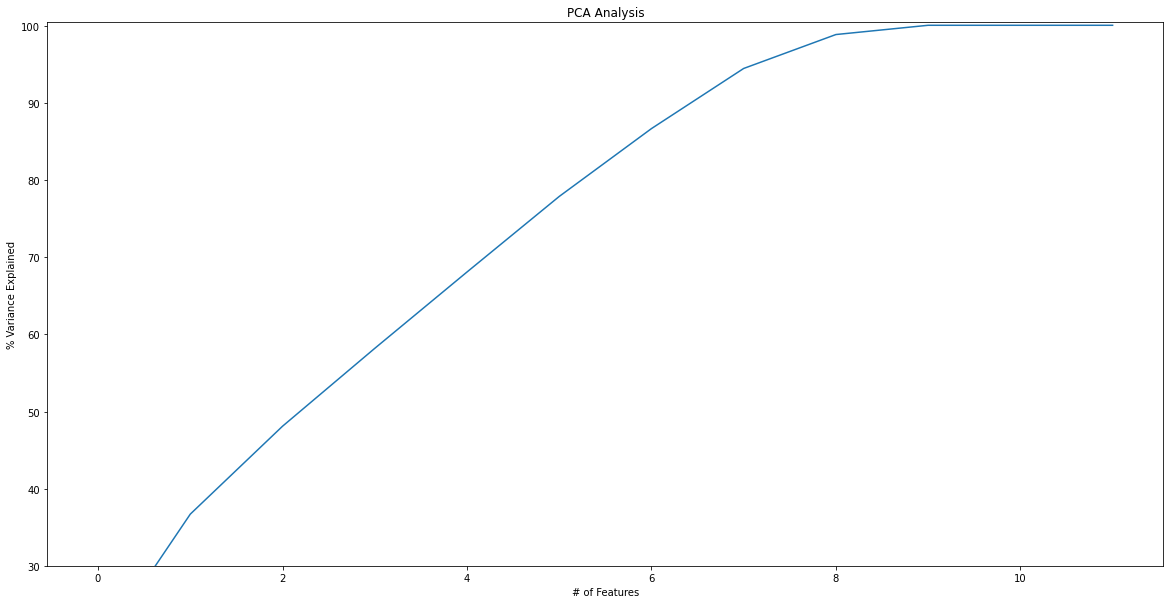

In [16]:
"""Removing items from the data set because PCA only allows numerical values
Converting Permit Type, Permit Class, permit class mapped, work class, condominium, date issued, 
PCA Calculations to get the variance of each feature to reduce the amount of features for the dataset
"""

data_frame_standarized = scale(data_columns_for_pca)
covariance_matrix = PCA(n_components = 12)
covariance_matrix.fit(data_frame_standarized)
variance = covariance_matrix.explained_variance_ratio_
var=np.cumsum(np.round(variance, decimals=3)*100)
plt.figure(figsize=(20,10))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

""" According to the PCA we would need approxiatemly 7 different features of the original 12 used because it would cover
cover almost 90% of the variance
""" 

In [ ]:

# Finding the multicollinearity of the data sets to reduce features because there are relationships between the multiple features
# Checking if the covariance matrix is the same as the PCA and Multicollinearity calculations and figuring out

"""from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
  
# the independent variables set
X = data[['Gender', 'Height', 'Weight']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

sns.heatmap(covarianceMatrix, annot=True, fmt='g')
plt.show()

#Calculate the VID for each column and then comparing it
[vif(data[iv].values, index) for index in range(len(iv))]
  
print(vif_data)
"""

Text(0.5, 1.0, 'Count of non-Building Permits')

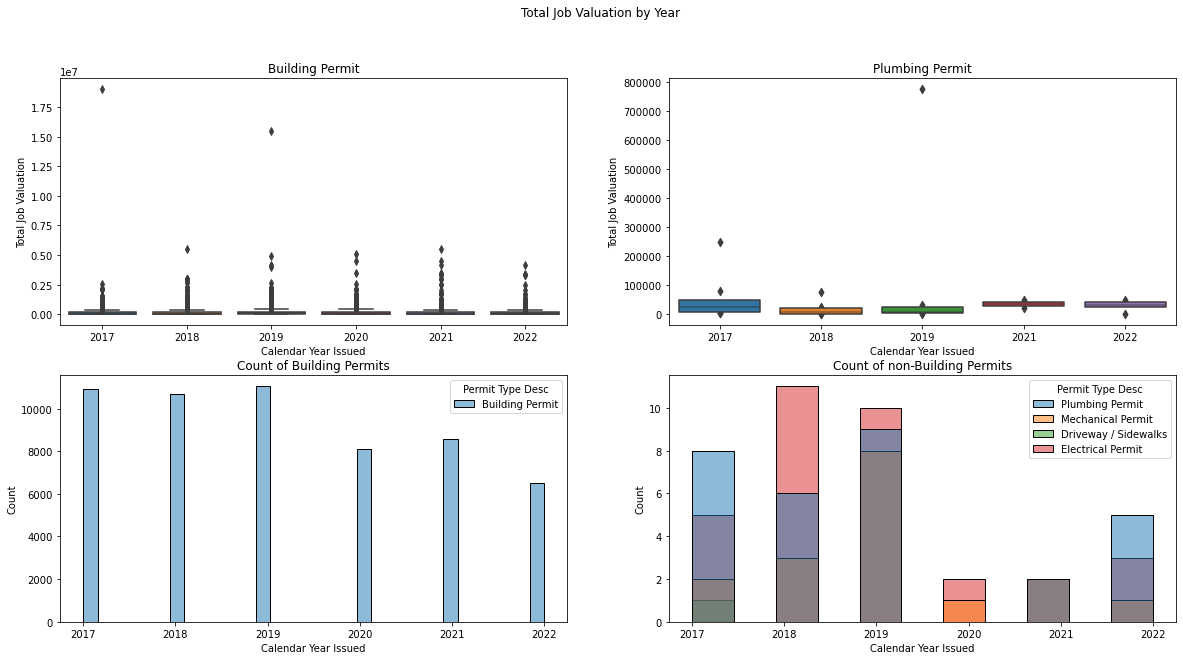

In [18]:
fig, axes = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('Count of Jobs by Year')
sns.histplot(ax=axes[0,0],data=data[data['Permit Type Desc']=="Building Permit"],x='Calendar Year Issued',hue='Permit Type Desc')
axes[1,0].set_title('Count of Building Permits')
sns.histplot(ax=axes[0,1],data=data[data['Permit Type Desc']!="Building Permit"],x='Calendar Year Issued',hue='Permit Type Desc')
axes[1,1].set_title('Count of non-Building Permits')

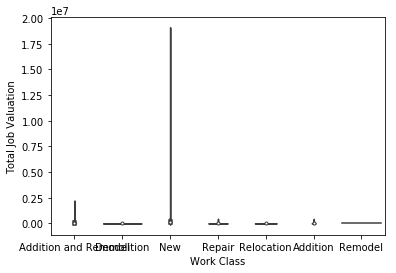

In [6]:
#fig, axes = plt.subplots(2,2,figsize=(20,10))
#fig.suptitle('Total Job Valuation for Building Permits by Year')
buildData = data[data['Permit Type Desc']=="Building Permit"]
sns.violinplot(data=buildData[buildData['Calendar Year Issued']==2017],x='Work Class',y='Total Job Valuation')
#axes[0,0].set_title('Building Permit')
#sns.boxplot(ax=axes[0,1],data=data[data['Permit Type Desc']=="Plumbing Permit"],x='Calendar Year Issued',y='Total Job Valuation')
#axes[0,1].set_title('Plumbing Permit')

Text(0.5, 1.0, '2022')

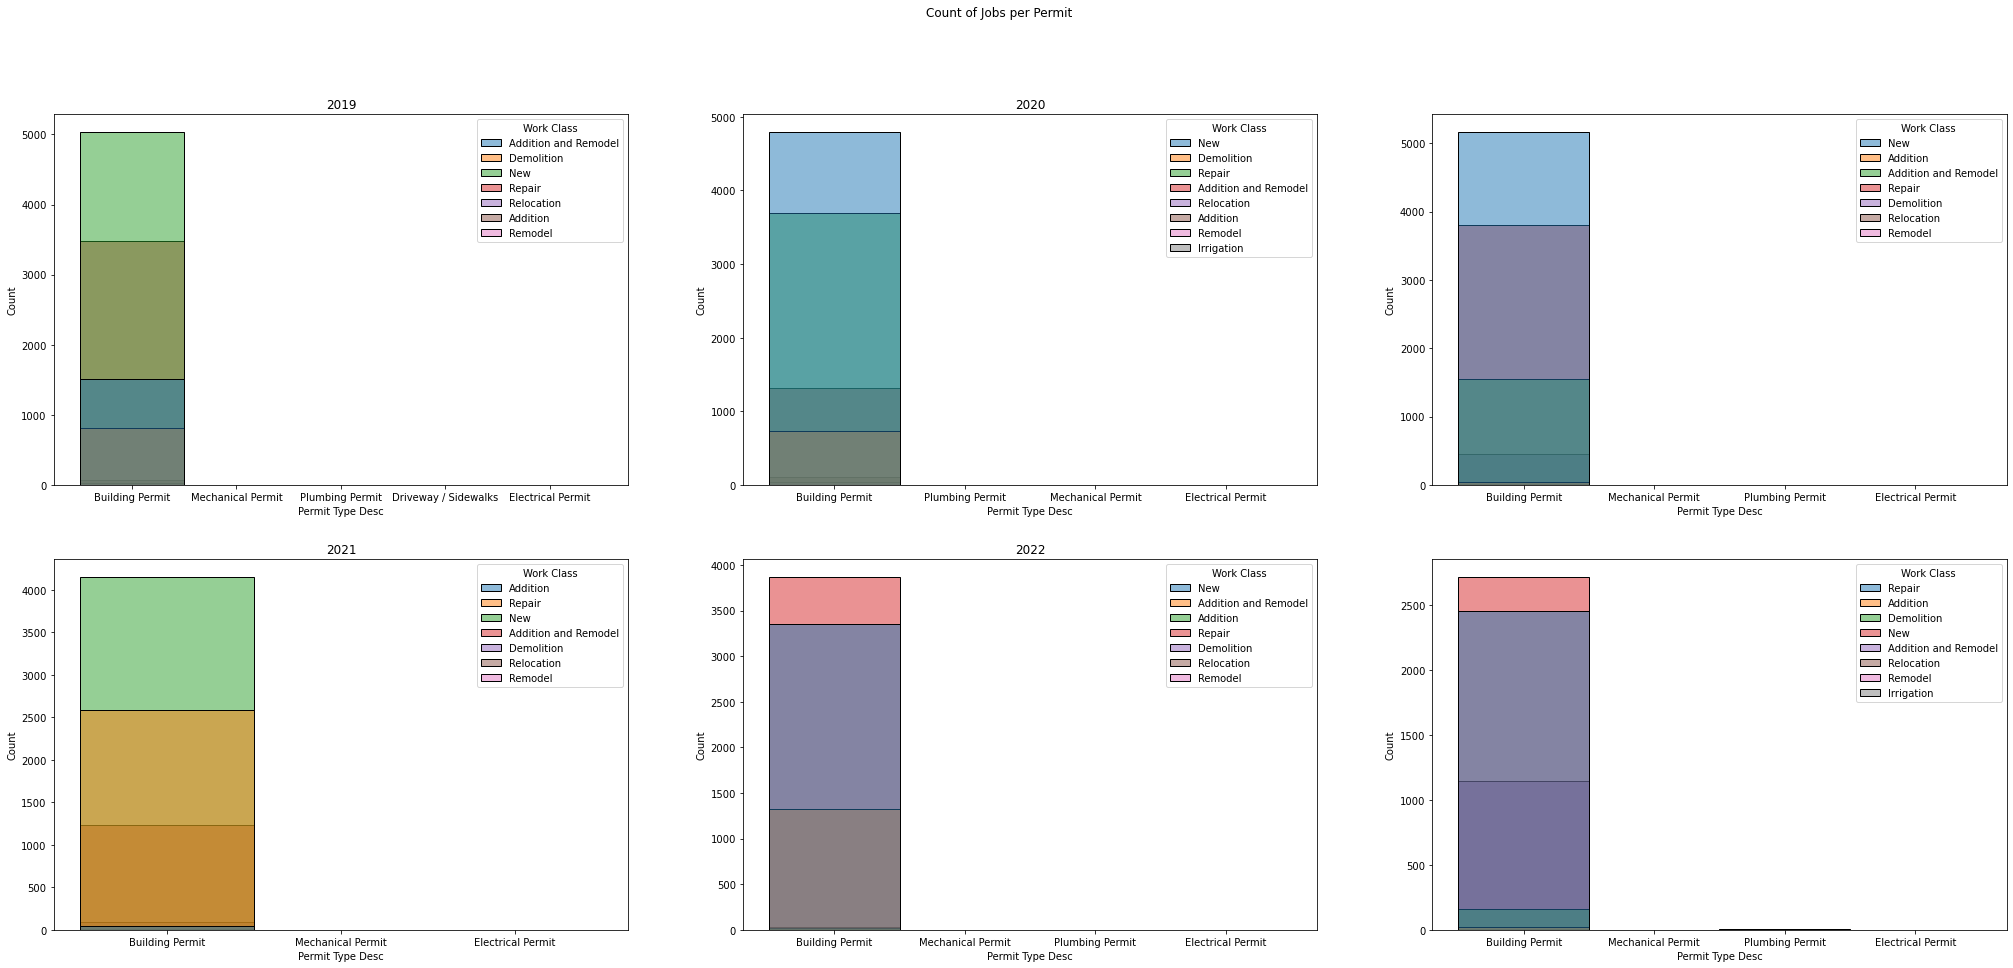

In [5]:
fig, axes = plt.subplots(2,3,figsize=(35,15))
fig.suptitle('Count of Jobs per Permit')
sns.histplot(ax=axes[0,0],data=data[data['Calendar Year Issued']==2017],x='Permit Type Desc',hue='Work Class')
axes[0,0].set_title('2017')
sns.histplot(ax=axes[0,1],data=data[data['Calendar Year Issued']==2018],x='Permit Type Desc',hue='Work Class')
axes[0,0].set_title('2018')
sns.histplot(ax=axes[0,2],data=data[data['Calendar Year Issued']==2019],x='Permit Type Desc',hue='Work Class')
axes[0,0].set_title('2019')
sns.histplot(ax=axes[1,0],data=data[data['Calendar Year Issued']==2020],x='Permit Type Desc',hue='Work Class')
axes[0,1].set_title('2020')
sns.histplot(ax=axes[1,1],data=data[data['Calendar Year Issued']==2021],x='Permit Type Desc',hue='Work Class')
axes[1,0].set_title('2021')
sns.histplot(ax=axes[1,2],data=data[data['Calendar Year Issued']==2022],x='Permit Type Desc',hue='Work Class')
axes[1,1].set_title('2022')

Text(0.5, 1.0, 'Electrical')

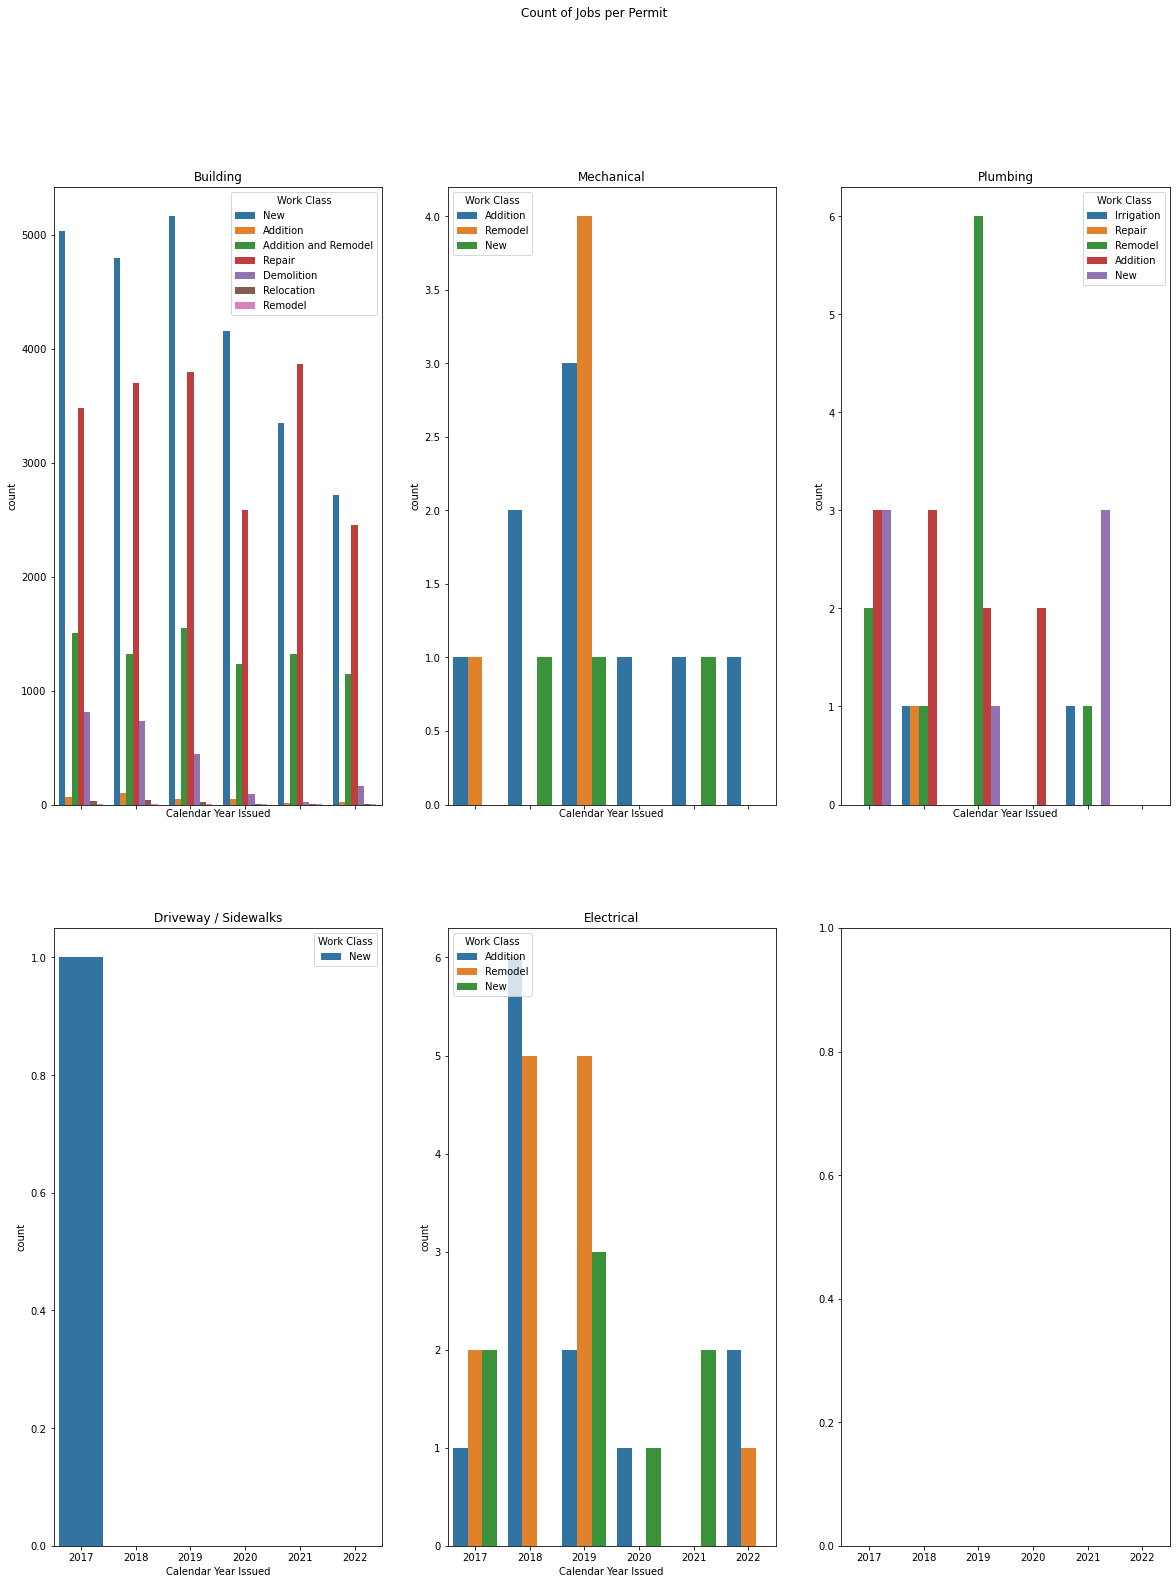

In [12]:
fig, axes = plt.subplots(2,3,figsize=(20,25),sharex=True)
fig.suptitle('Count of Jobs per Permit')
sns.countplot(ax=axes[0,0],data=data[data['Permit Type Desc']=="Building Permit"],x='Calendar Year Issued',hue='Work Class')
axes[0,0].set_title('Building')
sns.countplot(ax=axes[0,1],data=data[data['Permit Type Desc']=="Mechanical Permit"],x='Calendar Year Issued',hue='Work Class')
axes[0,1].set_title('Mechanical')
sns.countplot(ax=axes[0,2],data=data[data['Permit Type Desc']=="Plumbing Permit"],x='Calendar Year Issued',hue='Work Class')
axes[0,2].set_title('Plumbing')
sns.countplot(ax=axes[1,0],data=data[data['Permit Type Desc']=="Driveway / Sidewalks"],x='Calendar Year Issued',hue='Work Class')
axes[1,0].set_title('Driveway / Sidewalks')
sns.countplot(ax=axes[1,1],data=data[data['Permit Type Desc']=="Electrical Permit"],x='Calendar Year Issued',hue='Work Class')
axes[1,1].set_title('Electrical')
